<a href="https://colab.research.google.com/github/sai14karthik/DIP/blob/main/AP21110010310_DIP_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# DIP Lab Assignment **7**
# N.Sai Karthik (AP21110010310) CSE-E



Write programs to perform
following sharpening operations on a grayscale image


a. Laplacian filter



In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


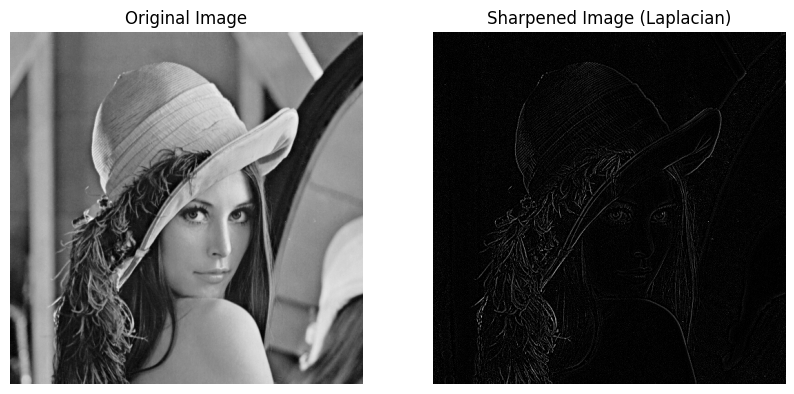

In [2]:
image = cv2.imread('/content/drive/MyDrive/DIP /Lenna_(test_image).png', cv2.IMREAD_GRAYSCALE)

laplacian_kernel = np.array([[0, -1, 0],
                             [-1, 4, -1],
                             [0, -1, 0]])

sharpened_image = cv2.filter2D(image, -1, laplacian_kernel)

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Sharpened Image (Laplacian)')
plt.imshow(sharpened_image, cmap='gray')
plt.axis('off')

plt.show()

b. Filtering using composite
mask



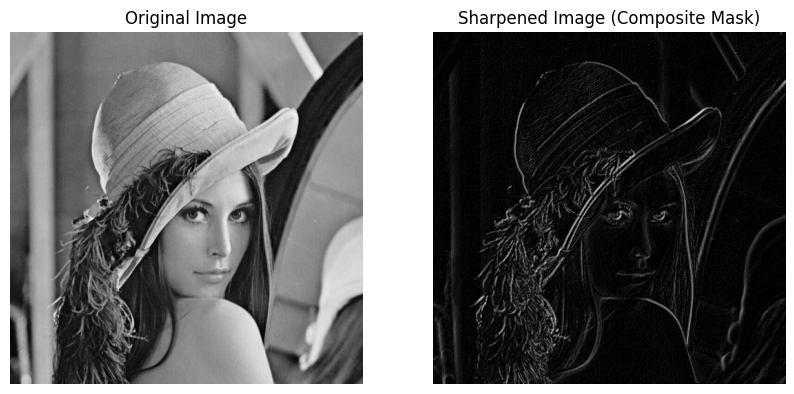

In [3]:
laplacian_kernel = np.array([[0, -1, 0],
                             [-1, 4, -1],
                             [0, -1, 0]])

sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

laplacian_filtered = cv2.filter2D(image, -1, laplacian_kernel)

sobel_x_filtered = cv2.filter2D(image, -1, sobel_x)
sobel_y_filtered = cv2.filter2D(image, -1, sobel_y)

composite_sharpened = cv2.addWeighted(laplacian_filtered, 0.5, sobel_x_filtered, 0.25, 0)
composite_sharpened = cv2.addWeighted(composite_sharpened, 1, sobel_y_filtered, 0.25, 0)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Sharpened Image (Composite Mask)')
plt.imshow(composite_sharpened, cmap='gray')
plt.axis('off')

plt.show()

c. Unsharp masking


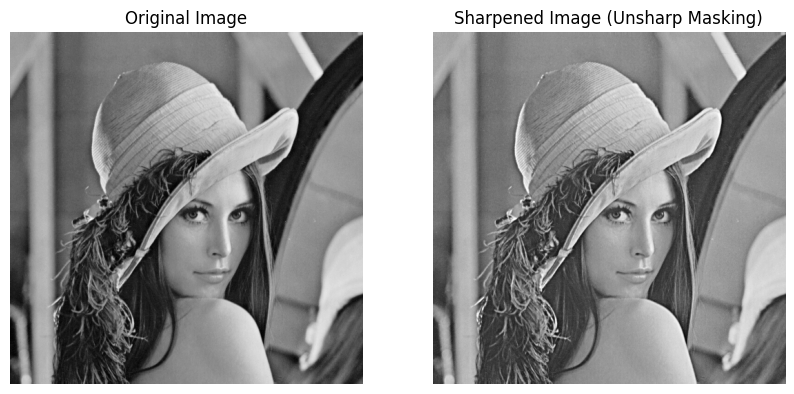

In [4]:
blurred_image = cv2.GaussianBlur(image, (9, 9), 10.0)

unsharp_mask = cv2.addWeighted(image, 1.5, blurred_image, -0.5, 0)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Sharpened Image (Unsharp Masking)')
plt.imshow(unsharp_mask, cmap='gray')
plt.axis('off')

plt.show()


d. High boost filtering


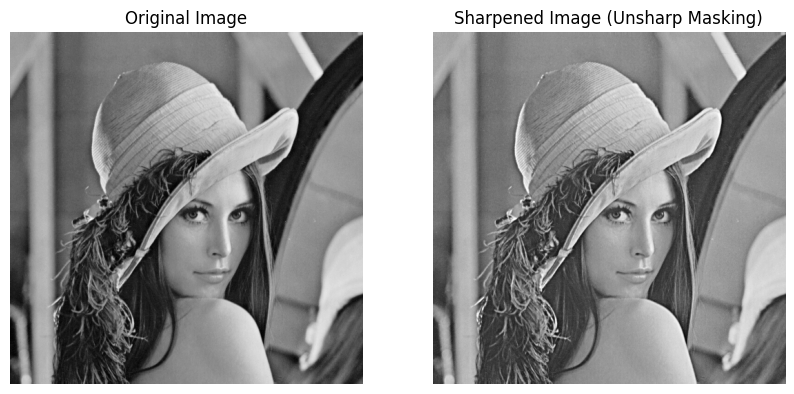

In [5]:
blurred_image = cv2.GaussianBlur(image, (9, 9), 10.0)

unsharp_mask = cv2.addWeighted(image, 1.5, blurred_image, -0.5, 0)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Sharpened Image (Unsharp Masking)')
plt.imshow(unsharp_mask, cmap='gray')
plt.axis('off')

plt.show()


e. Filtering using first order derivative operators
such as sobel and prewitt ma

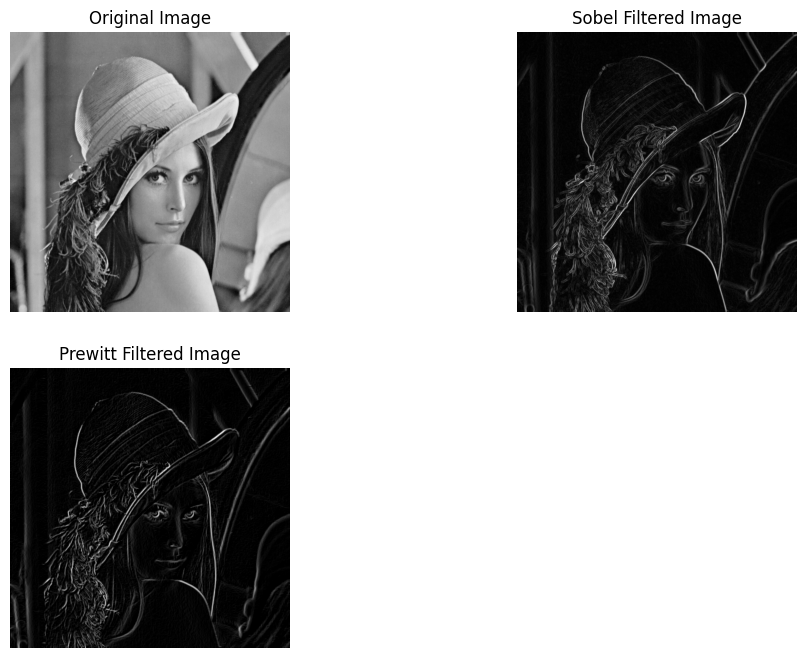

In [7]:
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

prewitt_x = np.array([[-1, 0, 1],
                      [-1, 0, 1],
                      [-1, 0, 1]])

prewitt_y = np.array([[-1, -1, -1],
                      [0, 0, 0],
                      [1, 1, 1]])

prewitt_x_filtered = cv2.filter2D(image, -1, prewitt_x)
prewitt_y_filtered = cv2.filter2D(image, -1, prewitt_y)

prewitt_x_filtered = np.float32(prewitt_x_filtered)
prewitt_y_filtered = np.float32(prewitt_y_filtered)

prewitt_combined = cv2.magnitude(prewitt_x_filtered, prewitt_y_filtered)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Sobel Filtered Image')
plt.imshow(sobel_combined, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Prewitt Filtered Image')
plt.imshow(prewitt_combined, cmap='gray')
plt.axis('off')

plt.show()